# MSAAI 510 Medical No Show Appointments

## By Brett Payton & Parker Christenson


### `Problem Statement`
___
● Problem 1: Dr. Dave Friesen & Associates is a San Diego based outpatient 
medical practice losing nearly $250,000 annually from unattended medical 
appointments. 


● Problem 2: Appointment no-shows or cancellations typically result in 
decreased practice efficiency, lost time, lower patient satisfaction, and added 
stress on staff. For a doctor working an eight-hour shift full of 20-minute 
reserved appointments, three unfilled cancellations cause a productivity 
decline of 12.5%. 

● Problem 3: On a monthly basis, we average 86 established patients who do 
not show and 43 new patients who do the same.
___

### `This notebook will contain the following sections`

##### **1.** Exploratory Data Analysis (EDA)
##### **2.** Data Preprocessing and Data cleaning
##### **3.** Model Building
##### **4.** Model Evaluation 



## `Exploratory Data Analysis (EDA)`

#### In this notebook we are going to be looking at some basic statistics of the data, as well as some visualizations to get a better understanding of the data.


We are going to be looking at if we can find any trends with no show and show appointments. We will also be looking to see if we are able to find any trends with the age of the patients and if they show up to their appointments.

Since medical appointments are important, our efforts will be to see if there are any high correlating features, along with getting a better understanding of the underlyting data set that we are working with, like null values, and working on any other kinds of data cleaning that may be needed before we feed our data into a model. 


In [39]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [40]:
# opening data with polars 
df = pl.read_csv('data.csv', ignore_errors=True)
df = df.to_pandas()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [41]:
# making all of the columns lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [42]:
# getting the data types of the columns
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no-show            object
dtype: object

In [43]:
# convertign schedule_day and appointmentday to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# getting the min and the max of the scheduledday and appointmentday cols 
min_scheduled_day = df['scheduledday'].min()
max_scheduled_day = df['scheduledday'].max()
min_appointment_day = df['appointmentday'].min()
max_appointment_day = df['appointmentday'].max()

print(f"Minimum Scheduled Day: {min_scheduled_day}")
print(f"Maximum Scheduled Day: {max_scheduled_day}")
print(f"Minimum Appointment Day: {min_appointment_day}")
print(f"Maximum Appointment Day: {max_appointment_day}")

Minimum Scheduled Day: 2015-11-10 07:13:56+00:00
Maximum Scheduled Day: 2016-06-08 20:07:23+00:00
Minimum Appointment Day: 2016-04-29 00:00:00+00:00
Maximum Appointment Day: 2016-06-08 00:00:00+00:00


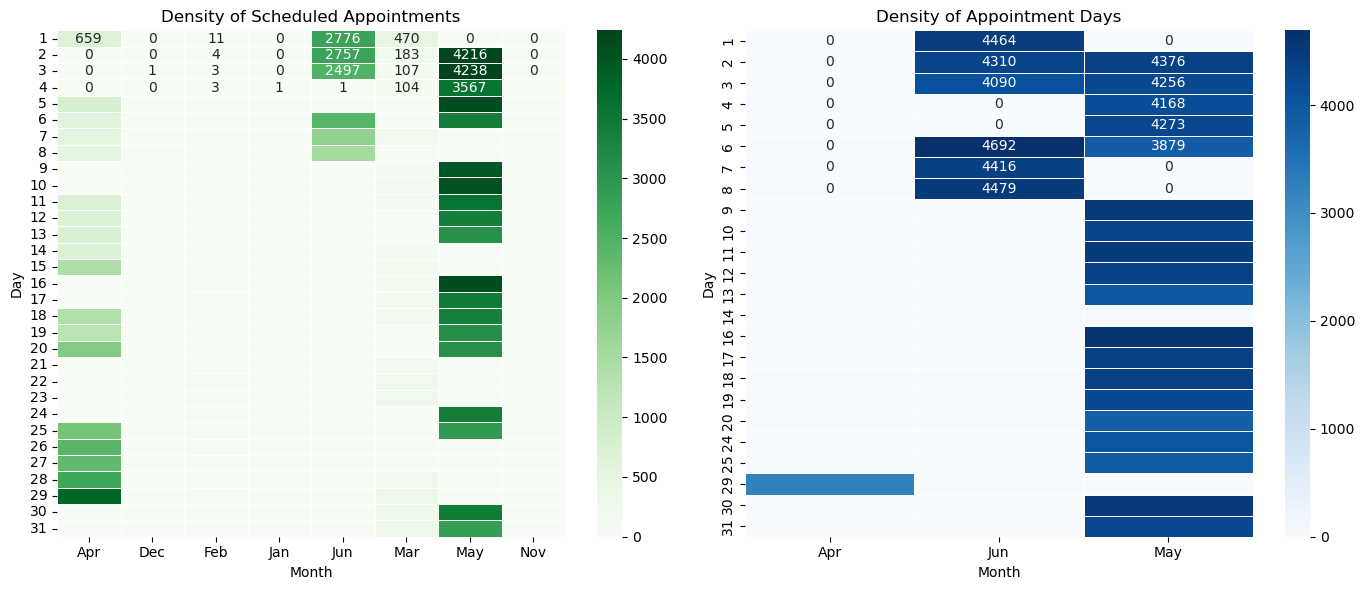

In [44]:
# making heatmaps of both the scheduledday and appointmentday columns

df['scheduled_month'] = df['scheduledday'].dt.month_name().str[:3]
df['scheduled_day'] = df['scheduledday'].dt.day
df['appointment_month'] = df['appointmentday'].dt.month_name().str[:3]
df['appointment_day'] = df['appointmentday'].dt.day

# Pivot tables for heatmaps
scheduled_heatmap_data = df.pivot_table(index='scheduled_day', columns='scheduled_month', aggfunc='size', fill_value=0)
appointment_heatmap_data = df.pivot_table(index='appointment_day', columns='appointment_month', aggfunc='size', fill_value=0)

# Plotting the heatmaps
plt.figure(figsize=(14, 6))

# Heatmap for scheduled appointments
plt.subplot(1, 2, 1)
sns.heatmap(scheduled_heatmap_data, cmap='Greens', cbar=True, linewidths=.5, annot=True, fmt='d')
plt.title('Density of Scheduled Appointments')
plt.xlabel('Month')
plt.ylabel('Day')

# Heatmap for appointment days
plt.subplot(1, 2, 2)
sns.heatmap(appointment_heatmap_data, cmap='Blues', cbar=True, linewidths=.5, annot=True, fmt='d')
plt.title('Density of Appointment Days')
plt.xlabel('Month')
plt.ylabel('Day')

plt.tight_layout()
plt.show()

In [45]:
# getting the unique values of the age column
unique_ages = df['age'].unique()
max_age = df['age'].max()
min_age = df['age'].min()
mean_age = df['age'].mean()

print(f"Maximum Age: {max_age}")
print(f"Minimum Age: {min_age}")
print(f"Mean Age: {mean_age}")
print(unique_ages)

Maximum Age: 115
Minimum Age: -1
Mean Age: 37.08887421173107
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [46]:
# converting the -1 age to positive
df['age'] = df['age'].abs()
print(df['age'].min())

0


In [47]:
# Now making buckets to sort the age groups into different categories

# age groups
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

# making a new column for the age group
df['age_group'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf], labels=age_groups)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduled_month,scheduled_day,appointment_month,appointment_day,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Apr,29,Apr,29,60-69
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Apr,29,Apr,29,50-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Apr,29,Apr,29,60-69
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Apr,29,Apr,29,0-9
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Apr,29,Apr,29,50-59


c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


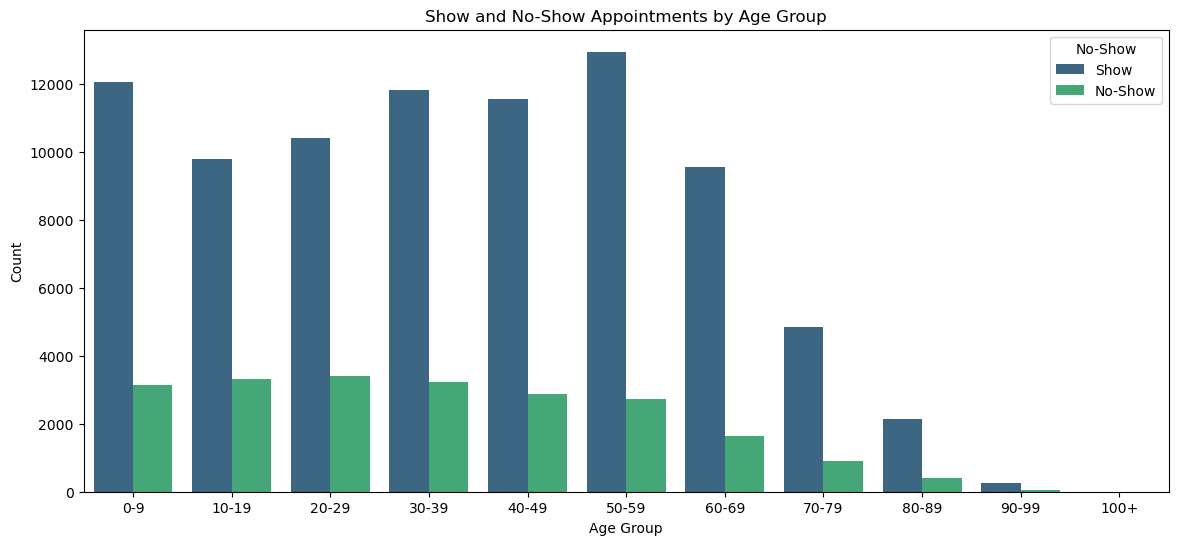

In [48]:
# histogram of the age groups if they had no-show appointments
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='age_group', hue='no-show', palette='viridis')
plt.title('Show and No-Show Appointments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='No-Show', labels=['Show', 'No-Show'])
plt.show()

In [49]:
# count the frequency of each patient_id
patient_counts = df['patientid'].value_counts()

# categorize the frequencies into buckets
def categorize_frequency(count):
    if count == 1:
        return '1 time'
    elif count == 2:
        return '2 times'
    elif count == 3:
        return '3 times'
    elif count == 4:
        return '4 times'
    elif count == 5:
        return '5 times'
    elif count == 6:
        return '6 times'
    else:
        return 'more than 6 times'

# apply the function
patient_buckets = patient_counts.apply(categorize_frequency)

# count the number of patient_ids in each bucket
bucket_counts = patient_buckets.value_counts().sort_index()

# display 
bucket_counts

count
1 time               37915
2 times              13895
3 times               5500
4 times               2367
5 times               1119
6 times                553
more than 6 times      945
Name: count, dtype: int64

In [50]:
# converting 'no-show' to 1 for 'No' and 0 for 'Yes'
df['no-show'] = df['no-show'].replace({'No': 1, 'Yes': 0})

# creating a new DataFrame with just the unique patient IDs
df_show_rate_buckets = df.drop_duplicates(subset=['patientid'])
df_show_rate_buckets = df_show_rate_buckets[['patientid']]

# getting the count of unique appointmentid for each patientid and making a new column called appt_count
appt_counts = df.groupby('patientid')['appointmentid'].nunique()
df_show_rate_buckets = df_show_rate_buckets.set_index('patientid')
df_show_rate_buckets['appt_count'] = appt_counts
df_show_rate_buckets = df_show_rate_buckets.reset_index()

# now getting the show rate percent for each patientid
show_rate = df.groupby('patientid')['no-show'].mean()
df_show_rate_buckets = df_show_rate_buckets.set_index('patientid')
df_show_rate_buckets['show_rate'] = show_rate
df_show_rate_buckets = df_show_rate_buckets.reset_index()


# display the resulting DataFrame
df_show_rate_buckets.head()


C:\Users\tehwh\AppData\Local\Temp\ipykernel_17788\1681614072.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['no-show'] = df['no-show'].replace({'No': 1, 'Yes': 0})


,patientid,appt_count,show_rate
0,2.987250e+13,2.0,1.0
1,5.589978e+14,2.0,1.0
2,4.262962e+12,2.0,1.0
3,8.679512e+11,2.0,0.5
4,8.841186e+12,1.0,1.0


In [51]:
# now doing the buckets

def categorize_frequency(count):
    if count == 1:
        return '1 time'
    elif count == 2:
        return '2 times'
    elif count == 3:
        return '3 times'
    elif count == 4:
        return '4 times'
    elif count == 5:
        return '5 times'
    elif count == 6:
        return '6 times'
    else:
        return 'more than 6 times'

df_show_rate_buckets['appt_count_bucket'] = df_show_rate_buckets['appt_count'].apply(categorize_frequency)

# Calculating the average show rate for each bucket
avg_show_rate_by_bucket = df_show_rate_buckets.groupby('appt_count_bucket')['show_rate'].mean().reset_index()

# Display the resulting DataFrame
df_show_rate_buckets.head()
avg_show_rate_by_bucket
bucket_counts

count
1 time               37915
2 times              13895
3 times               5500
4 times               2367
5 times               1119
6 times                553
more than 6 times      945
Name: count, dtype: int64

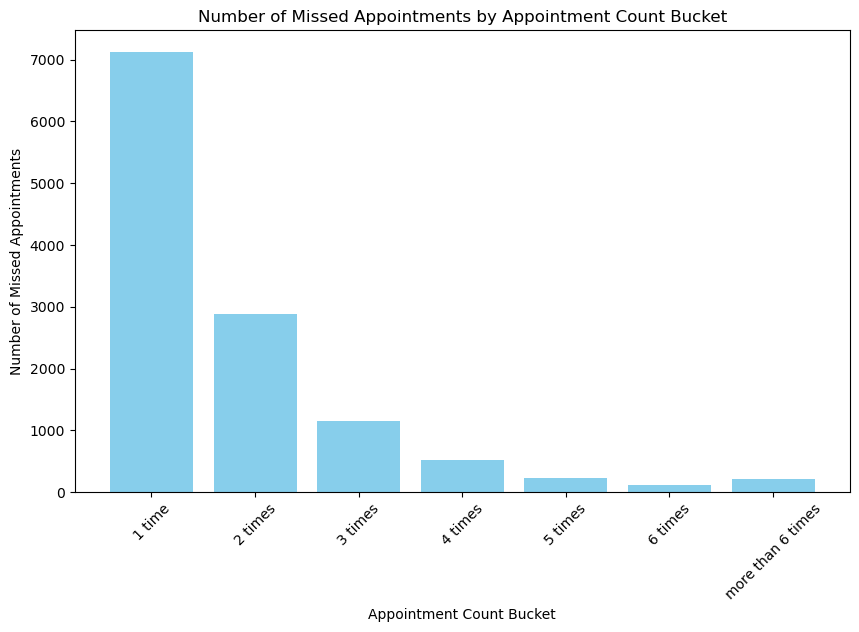

In [52]:
# Counting the number of missed appointments (no-show) for each bucket
missed_appointments_by_bucket = df_show_rate_buckets.groupby('appt_count_bucket')['show_rate'].apply(lambda x: (1 - x).sum()).reset_index()

# Renaming the columns for better understanding
missed_appointments_by_bucket.columns = ['appt_count_bucket', 'missed_appointments']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(missed_appointments_by_bucket['appt_count_bucket'], missed_appointments_by_bucket['missed_appointments'], color='skyblue')
plt.xlabel('Appointment Count Bucket')
plt.ylabel('Number of Missed Appointments')
plt.title('Number of Missed Appointments by Appointment Count Bucket')
plt.xticks(rotation=45)
plt.show()

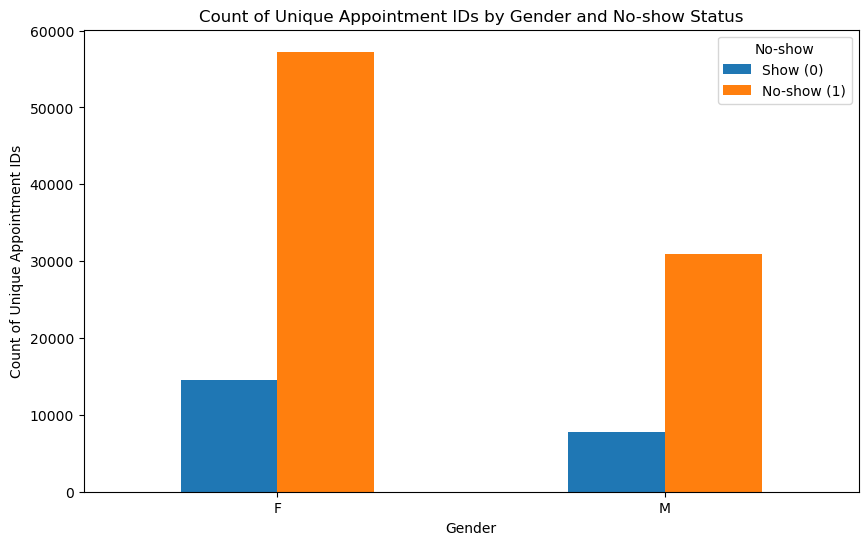

In [53]:
# Grouping by gender and no-show, and counting unique appointmentid
appointment_counts = df.groupby(['gender', 'no-show'])['appointmentid'].nunique().reset_index()

# Pivot the DataFrame for better plotting
appointment_counts_pivot = appointment_counts.pivot(index='gender', columns='no-show', values='appointmentid').fillna(0)

# Plotting the counts in a bar chart
appointment_counts_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count of Unique Appointment IDs')
plt.title('Count of Unique Appointment IDs by Gender and No-show Status')
plt.xticks(rotation=0)
plt.legend(title='No-show', labels=['Show (0)', 'No-show (1)'])
plt.show()

In [54]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduled_month,scheduled_day,appointment_month,appointment_day,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Apr,29,Apr,29,60-69
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Apr,29,Apr,29,50-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Apr,29,Apr,29,60-69
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Apr,29,Apr,29,0-9
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Apr,29,Apr,29,50-59


In [55]:
# convertign schedule_day and appointmentday to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# making a new column that shows the difference between the scheduledday and the appointmentday
df['wait_days'] = (df['appointmentday'] - df['scheduledday']).dt.days
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,scheduled_month,scheduled_day,appointment_month,appointment_day,age_group,wait_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Apr,29,Apr,29,60-69,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Apr,29,Apr,29,50-59,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,Apr,29,Apr,29,60-69,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Apr,29,Apr,29,0-9,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Apr,29,Apr,29,50-59,-1


#### `Important Note:` 

We can see we have tons of -1 values, and they are being converted to negative 1 because they are walk in appointments/ same day appointments. We will be converting all negative values to zero, effectively marking them as a walk in/same day appointment. And we will be adding a new coulumn called walk_in_appointment to indicate if the appointment was a walk in appointment or not.

# `Data Preprocessing and Data Cleaning`

In this section, we are going to be loading up a new data frame for our preprocessing and data cleaning. We will be looking at the data types of the columns, and we will be looking at the null values in the data set. We will also be looking at the unique values in the data set to see if there are any values that need to be cleaned up. In this section we will be dealing with all of the data cleaning that well be done before we feed our data into a model section. 

In [56]:
# importing all of the libraries
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [57]:
# opening data with polars 
df = pl.read_csv('data.csv', ignore_errors=True)
df = df.to_pandas()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [58]:
# making all of the coulmns lowercase
df.columns = map(str.lower, df.columns)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [59]:
# converting no-show to 1 for no and 0 for yes
df['no-show'] = df['no-show'].replace({'No': 'Showed', 'Yes': 'No Show'})

In [60]:
# dropping all rows from the data frame with the ages, 0, and -1
df = df[(df['age'] > 0)]
df.age.min()
df.age.max()

115

In [61]:
# getting the data types of the columns
df.dtypes

# Converting the gender column to int64 data type, Male = 1, Female = 0
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Converting scheduledday and appointmentday to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Stripping the time from the scheduledday and appointmentday so it is just the date
df['scheduledday'] = df['scheduledday'].dt.normalize()
df['appointmentday'] = df['appointmentday'].dt.normalize()

# Define the age bins and corresponding labels
age_bins = [0, 10, 18, 26, 65, np.inf]
age_labels = ['Child (0-10)', 'Youth (10-17)', 'Young Adult (18-25)', 'Adult (26-65)', 'Senior (65+)']

# Create a new column for the age group
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Now making a column for the days between the scheduled day and the appointment day for each appointmentid
df['date_diff'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Display the resulting DataFrame
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,date_diff
0,2.987250e+13,5642903,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed,Adult (26-65),0
1,5.589978e+14,5642503,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed,Adult (26-65),0
2,4.262962e+12,5642549,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed,Adult (26-65),0
3,8.679512e+11,5642828,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed,Child (0-10),0
4,8.841186e+12,5642494,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed,Adult (26-65),0


In [62]:
# getting the min and the max of the date_diff column
df['date_diff'].min(), df['date_diff'].max()

(-6, 179)

In [63]:
# getting the counts for all of the date_diff values and making it a data frame called date_diff_counts
date_diff_counts = df['date_diff'].value_counts().reset_index()
date_diff_counts.columns = ['date_diff', 'count']
date_diff_counts 

,date_diff,count
0,0,37154
1,2,6636
2,4,5212
3,1,5028
4,7,4785
...,...,...
126,126,1
127,101,1
128,125,1
129,127,1


### `Very impotant note!`
##### Looking at the data difference, I noticed that there was approx 37 thousand appointments that had a date diffrence of -1. This removes a massive amount of training data. So to solve this, we are going to make the assumption that the appointment was a walk in, and we are going to mark anything lower than 1 as Zero, and we will take it a Same Day appointment. 

In [64]:
# making all negative values in the date_diff column to 0
df.loc[df['date_diff'] < 0, 'date_diff'] = 0

In [65]:
# min and max
df['date_diff'].min(), df['date_diff'].max()

(0, 179)

In [66]:
# Making a new column 'same_day_appointment'
df['same_day_appointment'] = df['date_diff'].apply(lambda x: 1 if x == 0 else 0)

In [67]:
# now making a made_day_otw column for the day of the week the appointment was made
df['made_day_otw'] = df['scheduledday'].dt.day_name()

# now making a appt_day_otw column for the day of the week the appointment was
df['appt_day_otw'] = df['appointmentday'].dt.day_name()

# making maps for the days of the week to convert them to numbers
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# now applying the maps to the made_day_otw and appt_day_otw columns
df['made_day_otw'] = df['made_day_otw'].map(day_map)
df['appt_day_otw'] = df['appt_day_otw'].map(day_map)

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,date_diff,same_day_appointment,made_day_otw,appt_day_otw
0,2.987250e+13,5642903,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed,Adult (26-65),0,1,4,4
1,5.589978e+14,5642503,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed,Adult (26-65),0,1,4,4
2,4.262962e+12,5642549,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed,Adult (26-65),0,1,4,4
3,8.679512e+11,5642828,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed,Child (0-10),0,1,4,4
4,8.841186e+12,5642494,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed,Adult (26-65),0,1,4,4


In [68]:
# printing all of the unique values in the columns
print(df['neighbourhood'].unique())

# printinging the number of unique values in the neighbourhood column
print(df['neighbourhood'].nunique())

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA'
 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO'
 'BELA VISTA' 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ'
 'UNIVERSITÁRIO' 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO'
 'PARQUE MOSCOSO' 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA'
 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC'
 'CONSOLAÇÃO' 'SÃO BENEDITO' 'PRAIA DO CANTO' 'BOA VISTA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'MORADA DE CAMBURI' 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE'
 'JESUS DE NAZARETH' 'SANTA LUÍZA' 'SANTA TEREZA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO' 'ILHA DAS CAIEIRAS' 'COMDUSA' 'SANTA CECÍLI

In [69]:
# Using pd.factorize to map unique values to integers
df['neighbourhood_code'], uniques = pd.factorize(df['neighbourhood'])

# Display the resulting DataFrame and the mapping
print(df[['neighbourhood', 'neighbourhood_code']].head())
print(dict(enumerate(uniques)))

       neighbourhood  neighbourhood_code
0    JARDIM DA PENHA                   0
1    JARDIM DA PENHA                   0
2      MATA DA PRAIA                   1
3  PONTAL DE CAMBURI                   2
4    JARDIM DA PENHA                   0
{0: 'JARDIM DA PENHA', 1: 'MATA DA PRAIA', 2: 'PONTAL DE CAMBURI', 3: 'REPÚBLICA', 4: 'GOIABEIRAS', 5: 'ANDORINHAS', 6: 'CONQUISTA', 7: 'NOVA PALESTINA', 8: 'DA PENHA', 9: 'TABUAZEIRO', 10: 'BENTO FERREIRA', 11: 'SÃO PEDRO', 12: 'SANTA MARTHA', 13: 'SÃO CRISTÓVÃO', 14: 'MARUÍPE', 15: 'GRANDE VITÓRIA', 16: 'SANTO ANDRÉ', 17: 'SOLON BORGES', 18: 'BONFIM', 19: 'JARDIM CAMBURI', 20: 'MARIA ORTIZ', 21: 'JABOUR', 22: 'ANTÔNIO HONÓRIO', 23: 'RESISTÊNCIA', 24: 'ILHA DE SANTA MARIA', 25: 'JUCUTUQUARA', 26: 'MÁRIO CYPRESTE', 27: 'SANTO ANTÔNIO', 28: 'BELA VISTA', 29: 'PRAIA DO SUÁ', 30: 'SANTA HELENA', 31: 'ITARARÉ', 32: 'INHANGUETÁ', 33: 'UNIVERSITÁRIO', 34: 'SÃO JOSÉ', 35: 'REDENÇÃO', 36: 'SANTA CLARA', 37: 'CENTRO', 38: 'PARQUE MOSCOSO', 39: 'DO MOSCO

In [70]:
# now mapping the age group column to numbers
age_group_map = {'Child (0-10)': 0, 'Youth (10-17)': 1, 'Young Adult (18-25)': 2, 'Adult (26-65)': 3, 'Senior (65+)': 4}
df['age_group'] = df['age_group'].map(age_group_map)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,date_diff,same_day_appointment,made_day_otw,appt_day_otw,neighbourhood_code
0,2.987250e+13,5642903,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed,3,0,1,4,4,0
1,5.589978e+14,5642503,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed,3,0,1,4,4,0
2,4.262962e+12,5642549,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Showed,3,0,1,4,4,1
3,8.679512e+11,5642828,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed,0,0,1,4,4,2
4,8.841186e+12,5642494,0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed,3,0,1,4,4,0


In [71]:
df_cleaned = df.copy()

In [72]:
# dropping the columns that are not needed now
df_experiment = df.copy()
df_experiment = df_experiment.drop(columns= ['neighbourhood', 'scheduledday'])

df = df.drop(columns=['neighbourhood', 'scheduledday', 'appointmentday'])
df.columns

Index(['patientid', 'appointmentid', 'gender', 'age', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show', 'age_group', 'date_diff', 'same_day_appointment',
       'made_day_otw', 'appt_day_otw', 'neighbourhood_code'],
      dtype='object')

In [73]:
df

,patientid,appointmentid,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,date_diff,same_day_appointment,made_day_otw,appt_day_otw,neighbourhood_code
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,Showed,3,0,1,4,4,0
1,5.589978e+14,5642503,0,56,0,0,0,0,0,0,Showed,3,0,1,4,4,0
2,4.262962e+12,5642549,0,62,0,0,0,0,0,0,Showed,3,0,1,4,4,1
3,8.679512e+11,5642828,0,8,0,0,0,0,0,0,Showed,0,0,1,4,4,2
4,8.841186e+12,5642494,0,56,0,1,1,0,0,0,Showed,3,0,1,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,0,0,0,0,0,1,Showed,3,35,0,1,1,20
110523,3.596266e+12,5650093,0,51,0,0,0,0,0,1,Showed,3,35,0,1,1,20
110524,1.557663e+13,5630692,0,21,0,0,0,0,0,1,Showed,2,41,0,2,1,20
110525,9.213493e+13,5630323,0,38,0,0,0,0,0,1,Showed,3,41,0,2,1,20


In [74]:
# saving df to a csv file
# df.to_csv('cleaned_data.csv', index=False)

### `Model Building`

In this section we are going to be building a Gradient Boost Classifier model to predict if a patient is going to show up to their appointment or not. We will also do some model evaluation to see how well our model is performing.

In [107]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,patientid,appointmentid,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group,date_diff,same_day_appointment,made_day_otw,appt_day_otw,neighbourhood_code
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,Showed,3,0,1,4,4,0
1,5.589978e+14,5642503,0,56,0,0,0,0,0,0,Showed,3,0,1,4,4,0
2,4.262962e+12,5642549,0,62,0,0,0,0,0,0,Showed,3,0,1,4,4,1
3,8.679512e+11,5642828,0,8,0,0,0,0,0,0,Showed,0,0,1,4,4,2
4,8.841186e+12,5642494,0,56,0,1,1,0,0,0,Showed,3,0,1,4,4,0


In [97]:


# select features and target
features = ['gender',
            'age',
            'scholarship',
            'hipertension',
            'diabetes',
            'alcoholism',
            'handcap',
            'sms_received',
            'age_group',
            'date_diff',
            'same_day_appointment',
            'made_day_otw',
            'appt_day_otw',
            'neighbourhood_code'
            ]

x = df[features]
y = df['no-show']



### `Split the Data`

In [98]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 101)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(80240, 115) (80240,)
(26747, 115) (26747,)


### `Gradient Boosting Classifier`

In [102]:
# Initialize dictionary to store accuracy scores
ac_dev_gbc = {}

# Loop over a range of n_estimators values
for i in range(200, 2000, 200):
    # Update parameters
    params = {
        'n_estimators': i,
        'max_depth': 4,
        'min_samples_split': 2,
        'learning_rate': 0.01,
        'loss': 'log_loss',
        'random_state': 101
    }
    
    # Create a GradientBoostingClassifier instance with the current parameters
    gbc = GradientBoostingClassifier(**params)
    
    # Fit the model on the training data
    gbc.fit(X_train, y_train)
    
    # Make predictions on the test data
    gbc_predictions = gbc.predict(X_test)
    
    # Calculate and store the accuracy score
    ac_dev_gbc[i] = metrics.accuracy_score(y_test, gbc_predictions)

# Output the dictionary containing n_estimators values and their corresponding accuracy scores
ac_dev_gbc

ac_dev_gbc

{200: 0.7977343253448985,
 400: 0.7978838748270835,
 600: 0.7979212621976296,
 800: 0.7977717127154447,
 1000: 0.7980334243092684,
 1200: 0.7977343253448985,
 1400: 0.7975100011216211,
 1600: 0.7975847758627136,
 1800: 0.7973604516394363}

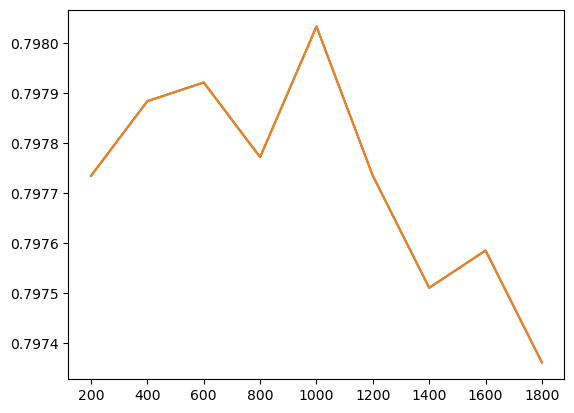

In [103]:
# plot the results
import matplotlib.pyplot as plt

plt.plot(ac_dev_gbc.keys(), ac_dev_gbc.values())


# Plot the results
plt.plot(ac_dev_gbc.keys(), ac_dev_gbc.values())
plt.show()

The best score occurs at n_estimators = 1000, therefore we are choosing it as our parameter.

Final Model

In [108]:
params = {
    'n_estimators': 1000,
    'max_depth': 4,
    'min_samples_split': 2,
    'learning_rate': 0.01,
    'loss': 'log_loss',  
    'random_state': 101
}

# Create the GradientBoostingClassifier instance with specified parameters
gbc = GradientBoostingClassifier(**params)

# Fit the model on the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
gbc_predictions = gbc.predict(X_test)

# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_test, gbc_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, gbc_predictions))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, gbc_predictions))


Accuracy: 0.7980
Classification Report:
              precision    recall  f1-score   support

     No Show       0.56      0.01      0.01      5410
      Showed       0.80      1.00      0.89     21337

    accuracy                           0.80     26747
   macro avg       0.68      0.50      0.45     26747
weighted avg       0.75      0.80      0.71     26747

Confusion Matrix:
[[   36  5374]
 [   28 21309]]


## `Explaining the Results`

### 1. **Accuracy:**
- **0.7980 (79.80%)**: This metric indicates the overall percentage of correct predictions (both true positives and true negatives) among the total number of cases examined. Approximately 80% of the test set predictions are correct.

### 2. **Classification Report:**
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low rate of false positives.
  - **No Show: 0.56** - For all instances predicted as no-shows, 56% were actually no-shows.
  - **Showed: 0.80** - For all instances predicted as shows, 80% were actually shows.
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in the actual class. High recall relates to a low rate of false negatives.
  - **No Show: 0.01** - Of all the actual no-shows, the model only correctly identified 1%.
  - **Showed: 1.00** - The model identified 100% of the actual shows correctly.
- **F1-Score**: The weighted average of Precision and Recall. This score takes both false positives and false negatives into account.
  - **No Show: 0.01** - Extremely low F1-score for no-shows indicates poor performance.
  - **Showed: 0.89** - High F1-score for `shows` indicates good performance.

### 3. **Confusion Matrix:**

  - [[ 36, 5374] - True no-shows (true positives for no-show) and false shows (false negatives for no-show).
  - [ 28, 21309]] - False no-shows (false positives for no-show) and true shows (true negatives for no-show).

### Summary:
- The model is highly biased towards predicting shows, leading to perfect recall for shows but practically non-existent recall for no-shows.
- The very low F1-score for no-shows suggests that the model is not effectively predicting no-shows under the current setup, but does accurately predict if the appointment will show, so we will need to do some adjustments to the data set, and get more data regarding the clients.
- The metrics are skewed due to a large number of 'Showed' predictions, with the macro average revealing poor overall performance.
